# Plots of COVID-19 deaths per county

Comparing Buffaloccio County (Erie), Helen County (St. Louis), most of the Russos County (St. Charles), Los Angeles (why? Just cuz)

Data taken from nytimes github area [here](https://github.com/nytimes/covid-19-data.git). 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('us-counties.csv', sep=',')
df['date'] = pd.to_datetime(df['date'])

In [4]:
labels = ['Los Angeles', "Erie", "Niagara", "St. Louis", "St. Charles"]

In [5]:
sels = [
        (df['state'] == 'California') & (df['county'] == 'Los Angeles'),
        (df['state'] == 'New York') & (df['county'] == 'Erie'),
        (df['state'] == 'New York') & (df['county'] == 'Niagara'),
        (df['state'] == 'Missouri') & (df['county'] == 'St. Louis'),
        (df['state'] == 'Missouri') & (df['county'] == 'St. Charles'),
        
]

In [6]:
pops = [10000000., 918702., 209281., 996919., 402000.]
colors = ['blue', 'red', 'green', 'purple', 'orange']

In [7]:
for i in range(5):
    df.loc[sels[i],'deaths'] = df[sels[i]]['deaths'].div(pops[i])

Text(0, 0.5, 'Deaths as fraction of population')

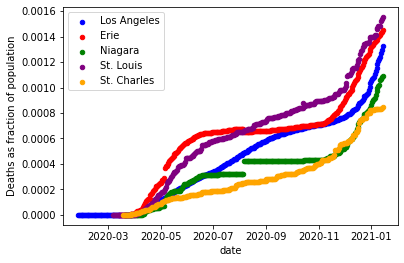

In [8]:
ax = None
for i in range(5):
    ax = df[sels[i]].plot.scatter(x="date", y="deaths", ax=ax, c=colors[i])  
    #plt.xticks( np.arange(min(df['date']), max(df['date']), 100) )
ax.legend(labels)
plt.ylabel('Deaths as fraction of population')